# <center> Polynomial Regression </center>

<center> $ \operatorname{y} = a+a $<sub>1</sub> $ x+a $<sub>2</sub> $ x^2+{...}+a $<sub>n</sub> $ x^n $ </center>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

##  Approach with Linear Regression 

       0           1
0   Year   Av_claims
1     05     42.33  
2     06      49.75 
3     07      66.27 
4     08      62.53 
5     09      49.28 
6     10      59.37 
7     11      85.94 
8     12      80.47 
9     13       91.43
10    14      118.11


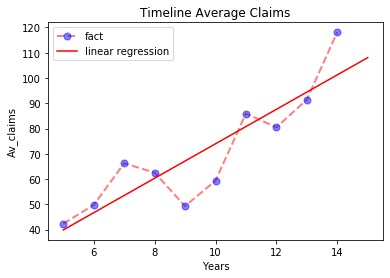

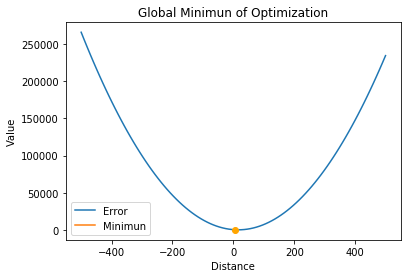

In [2]:

data = pd.read_csv("./insurance.csv", delimiter=",", header=None)

print(data)

n, p = data.shape
n -= 1

X = [int(i) for i in data[0][1:].values]
X = np.array(X)
X = X.reshape(n, 1)
Y = [float(i) for i in data[1][1:].values]
Y = np.array(Y)

plt.plot(X, Y, color='red',linestyle='dashed',linewidth=2,
                                 marker='o',markersize=7,markerfacecolor='blue',
                                 markeredgecolor='blue', alpha=0.5)

aX = np.hstack((np.ones((n, 1)), X))


#  Ordinary least squares.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

# Predictions
_X = np.array([[1, 5], [1, 15]])


# line
_Y = _X @ W

plt.title('Timeline Average Claims')
plt.ylabel('Av_claims')
plt.xlabel('Years')
plt.plot(_X[:,1], _Y, c="red")
plt.legend(['fact', 'linear regression'])
plt.show()



_x = np.linspace(-500, 500, 100)

mse = [np.square(aX @ np.array([w1, W[0]]) - Y).mean() for w1 in _x]

plt.title('Global Minimun of Optimization')
plt.plot(_x, mse)
plt.ylabel('Value')
plt.xlabel('Distance')
plt.plot([W[0],W[0]], [0, 50])
plt.plot(W[0], W[1], color='orange', marker='o')
plt.legend(['Error', 'Minimun'])
plt.show()

## Polynomial Regression.

---

<center>
$
  Y=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{13}^2 & x_{14}^2 & x_{15}^3 & x_{16}^3 & {...} & x_{1n}^n\\
   1 & x_{21} & x_{22} & x_{23}^2 & x_{24}^2 & x_{25}^3 & x_{26}^3 & {...} & x_{2n}^n \\
   {...} & {...} & {...} & {...} & {...} & {...} & {...} & {...} & {...} \\
   1 & x_{n1} & x_{n2} & x_{n3}^2 & x_{n4}^2 & x_{n5}^3 & x_{n6}^3 & {...} & x_{nn}^n \\
  \end{array} } \right]
$
</center>

In [3]:
def poly_matrix(X, grad):
    
    n, p = X.shape
    
    Xt = np.ones((n, 1))
    for i in range(p):
        for g in range(grad):
              Xt = np.hstack((Xt, np.power(X[:, i:i+1], g+1)))
        
    return Xt

Grade: 1 MSE: 108.6329838787879
Grade: 2 MSE: 72.54733046969693
Grade: 3 MSE: 54.177229041958526
Grade: 4 MSE: 50.78427519230611
Grade: 5 MSE: 45.47970748716731
Grade: 6 MSE: 19.087378797091425


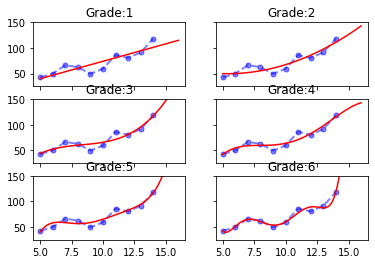

In [6]:
fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')
dataX = np.array(data[1:][:].astype(float))

for gr in range(1, 7):
    
    # Extension matrix
    aX = poly_matrix(dataX[:,:-1], gr)
    
    # OLS
    W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y
    
    _X = np.linspace(np.min(dataX[:, 0]), 16, 100)[:, np.newaxis]
    
    axs0 = [0, 0, 1, 1, 2, 2]
    axs1 = [0, 1, 0, 1, 0, 1]

    # Real points
    axes[axs0[gr-1], axs1[gr-1]].plot(dataX[:, 0], dataX[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)
    plt.ylim(25, 150)
    
    axes[axs0[gr-1], axs1[gr-1]].set_title("Grade:"+str(gr))
    
    # Evaluate
    axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")

    MSE = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))

    print("Grade:", gr,"MSE:", MSE(poly_matrix(X, gr) @ W, Y))

## Polynomial Regression with Sklearn

---


Grade: 1 MSE: 108.63298387878785
Grade: 2 MSE: 72.54733046969702
Grade: 3 MSE: 54.17722904195839
Grade: 4 MSE: 50.784275192307504
Grade: 5 MSE: 45.47970748716928
Grade: 6 MSE: 19.087378759815554


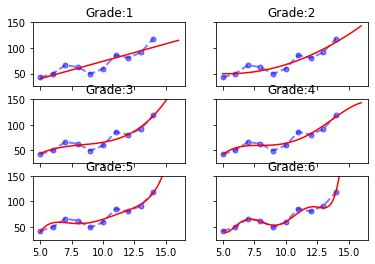

In [7]:

fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')

for gr in range(1,7):

    poly = PolynomialFeatures(gr)

    aX = poly.fit_transform(X)

    lreg = LinearRegression(fit_intercept=False)
    lreg.fit(aX, Y)

    W = np.array(lreg.coef_).T

    _X = np.linspace(np.min(dataX[:, 0]), 16, 100)[:, np.newaxis]
    
    axs0 = [0, 0, 1, 1, 2, 2]
    axs1 = [0, 1, 0, 1, 0, 1]

    axes[axs0[gr-1], axs1[gr-1]].plot(dataX[:, 0], dataX[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)
    
    plt.ylim(25, 150)

    axes[axs0[gr-1], axs1[gr-1]].set_title("Grade:"+str(gr))
    axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")
    MSE = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))

    print("Grade:", gr,"MSE:", MSE(poly_matrix(X, gr) @ W, Y))